In [1]:
import numpy as np
import pandas as pd
import cv2
import os

In [2]:
train_folder = '/content/drive/MyDrive/chest_xray/train'
test_folder = '/content/drive/MyDrive/chest_xray/test'
val_folder = '/content/drive/MyDrive/chest_xray/val'

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

In [4]:
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 256 # resize image

def get_data_train(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if img_array is not None:
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    data.append([new_array, class_num])
                else:
                    print(f"Could not read image: {os.path.join(path, img)}")
            except Exception as e:
                print(f"Error processing image {os.path.join(path, img)}: {e}")
    return np.array(data, dtype=object)

In [5]:
train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)

Could not read image: /content/drive/MyDrive/chest_xray/train/NORMAL/.DS_Store
Could not read image: /content/drive/MyDrive/chest_xray/train/PNEUMONIA/.DS_Store
Could not read image: /content/drive/MyDrive/chest_xray/val/NORMAL/.DS_Store
Could not read image: /content/drive/MyDrive/chest_xray/val/PNEUMONIA/.DS_Store


<Axes: xlabel='count'>

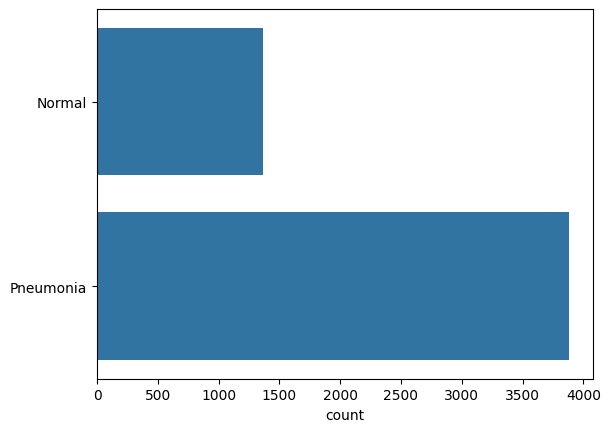

In [6]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Normal")
    else:
        l.append("Pneumonia")

sns.countplot(l)

In [7]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)

for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

In [8]:
X_train = np.array(X_train) / 255.0
X_val = np.array(X_val) / 255.0
X_test = np.array(X_test) / 255.0

In [9]:
X_test.shape

(640, 256, 256)

In [10]:
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

In [12]:
!pip install tensorflow

In [13]:
X_train.shape

(5252, 256, 256, 1)

In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation="relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), shuffle=True, callbacks=[callback])
scores = model.evaluate(X_test, y_test)

model.save("cnn_model.keras")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 36s 141ms/step - accuracy: 0.7366 - loss: 0.5431 - val_accuracy: 0.6250 - val_loss: 0.6353
Epoch 2/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.8910 - loss: 0.2956 - val_accuracy: 0.6250 - val_loss: 0.5808
Epoch 3/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9226 - loss: 0.1975 - val_accuracy: 0.8125 - val_loss: 0.4942
Epoch 4/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.9365 - loss: 0.1686 - val_accuracy: 0.7500 - val_loss: 0.4878
Epoch 5/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9375 - loss: 0.1561 - val_accuracy: 0.7500 - val_loss: 0.4769
Epoch 6/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.9478 - loss: 0.1333 - val_accuracy: 0.6875 - val_loss: 0.5542
Epoch 7/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.9375 - loss: 0.1615 - val_accuracy: 0.8125 - val_loss: 0.4065
Epoch 8/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.9534 - loss: 0.1312 -

In [15]:
# scores
print("Test loss {}".format(scores[0]))
print("Test accuracy {}".format(scores[1]))

Test loss 0.4308401942253113
Test accuracy 0.807812511920929


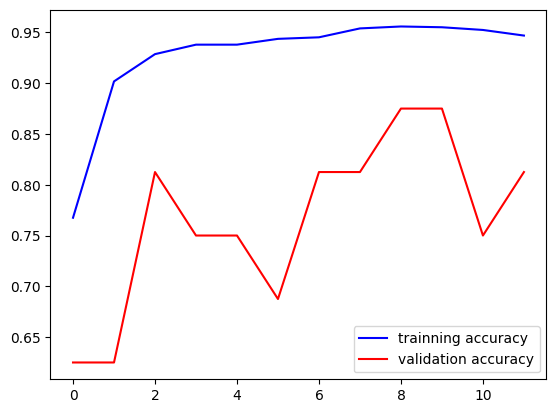

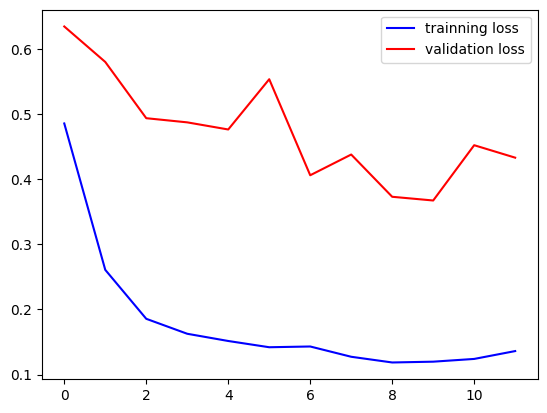

In [16]:
# visualization

import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [17]:
# predict classes

prediction = model.predict(X_test)
prediction = (prediction > 0.5).astype(int).reshape(1, -1)[0]
prediction[:15]

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step


array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

In [18]:
correct = np.nonzero(prediction == y_test)[0]
incorrect = np.nonzero(prediction != y_test)[0]

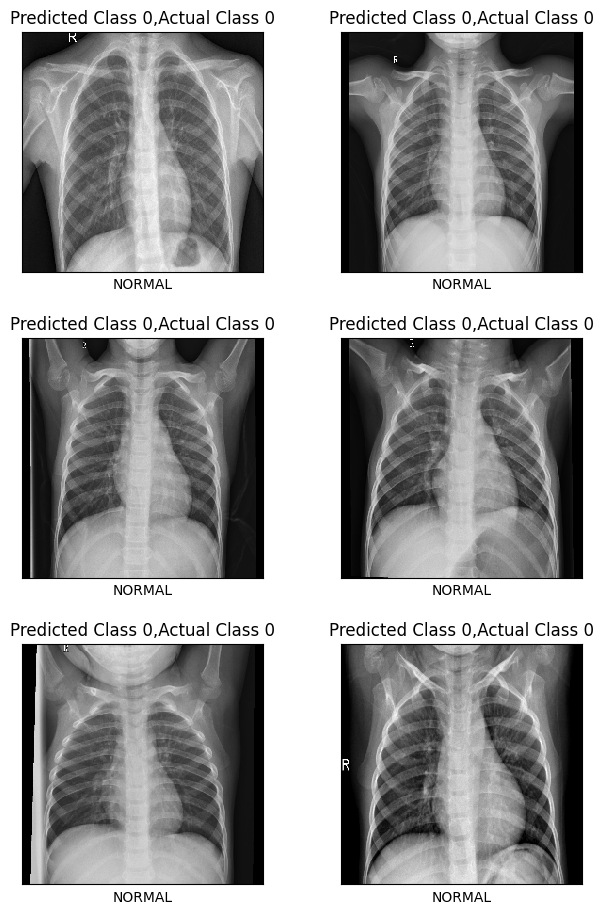

In [19]:
j = 0
plt.figure(figsize=(10, 10))
for i in correct[:6]:
    plt.subplot(3,2,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(256,256), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(prediction[i], y_test[i]))
    plt.xlabel(labels[prediction[i]])
    plt.tight_layout()
    j += 1
plt.tight_layout(pad=2.0)  # Add padding between plots
plt.subplots_adjust(top=0.9)  # Leave room at the top
plt.show()

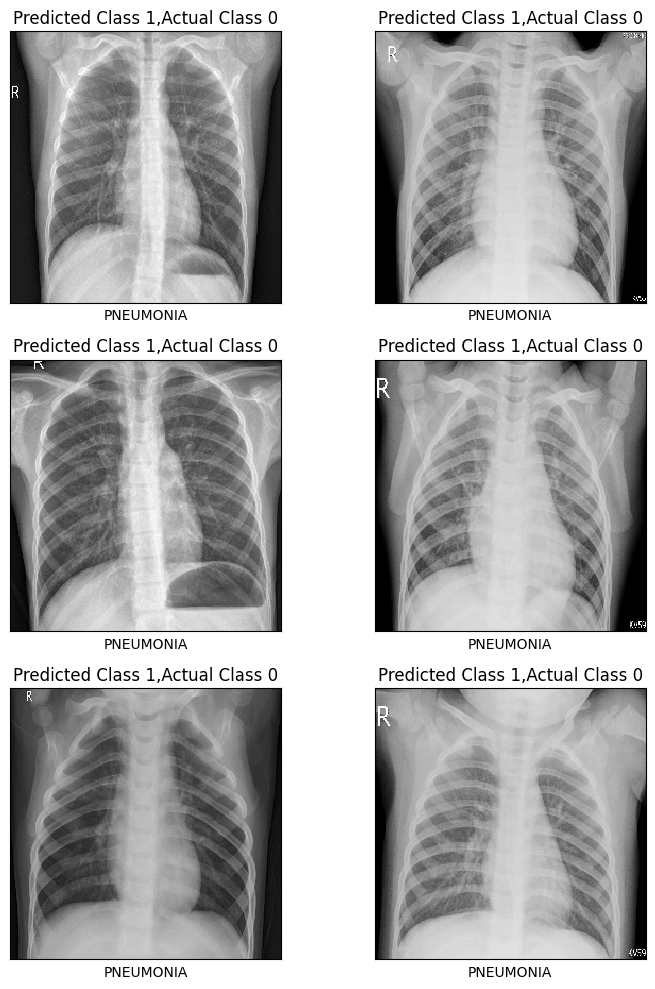

In [20]:
j = 0
plt.figure(figsize=(10, 10))
for i in incorrect[:6]:
    plt.subplot(3,2,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(256,256), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(prediction[i], y_test[i]))
    plt.xlabel(labels[prediction[i]])
    plt.tight_layout()
    j += 1

In [21]:
# load model and predict some some external photo

labels = ["NORMAL", "PNEUMONIA"]
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("cnn_model.keras") # load model

In [25]:
# extra x-ray photo from google
prediction = model.predict([prepare("x-ray-photo-image-chest-Pneumonia.jpg")])
print(labels[int(prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
PNEUMONIA


/tmp/ipython-input-25-644997598.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(labels[int(prediction[0])])


In [26]:
prediction = model.predict([prepare("x-ray-photo-image-chest-Normal.jpg")])
print(labels[int(prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
NORMAL


/tmp/ipython-input-26-3691673166.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(labels[int(prediction[0])])
